## Credit Card Fraud Detection Project

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # For splitting the dataset
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc # For model evaluation
from sklearn.model_selection import cross_val_score # For cross-validation
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd .read_csv("E:\Credit Card Fraud Detection Project\Files\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info() # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe() # Statistical summary of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.columns # List all column names

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isnull().sum() # Check for missing values in each column

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

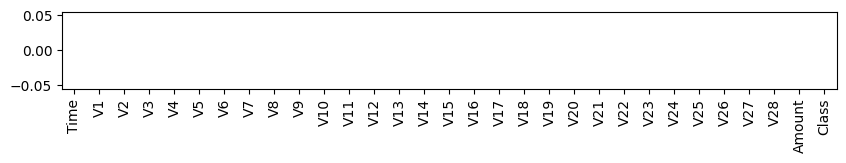

In [7]:
df.isnull().sum().plot(kind="bar", figsize=(10,1) ) # Check for null values in each column
# We will consider that there are no null values as the bar plot shows 0 null values for each column

In [8]:
df.nunique() # Check for unique values in each column

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [9]:
df.dtypes # Check data types of each column

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
df.duplicated().sum() # Check for duplicate rows

1081

Text(0, 0.5, 'Number of Transactions')

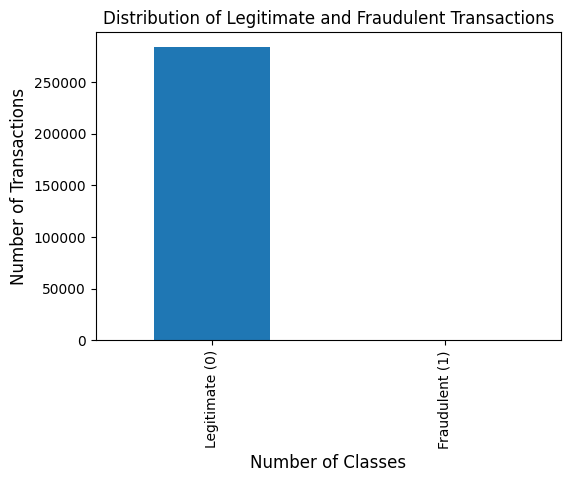

In [11]:
# Checking for legitimate and fraudulent transactions
df['Class'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Distribution of Legitimate and Fraudulent Transactions')
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraudulent (1)'])
plt.xlabel('Number of Classes', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

In [12]:
df['Class'].value_counts() # Check the distribution of the target variable
# The dataset is highly imbalanced with a majority of legitimate transactions (0) and a minority of fraudulent transactions (1)


Class
0    284315
1       492
Name: count, dtype: int64

In [13]:
# Separate data for analysis
real =df[df["Class"]==0]
fake = df[df["Class"]==1]

In [14]:
print(real.shape)
print(fake.shape)

(284315, 31)
(492, 31)


In [15]:
#Statistical measures of the two classes
real.Amount.describe() # Statistical summary of transaction amounts for legitimate transactions

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
fake.Amount.describe() # Fraudulent transactions tend to have higher amounts on average

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
# Compare the distribution of transaction amounts for both classes
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


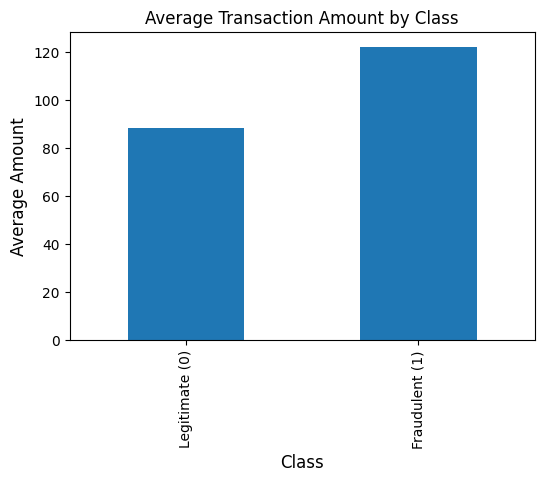

In [18]:
# Compare the distribution of transaction amounts for both classes visually 
df.groupby("Class")["Amount"].mean().plot(kind="bar", figsize=(6,4))
plt.title("Average Transaction Amount by Class")
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraudulent (1)'])
plt.xlabel("Class", fontsize=12)
plt.ylabel("Average Amount", fontsize=12)
plt.show()

# Dealing with unbalanced data

In [19]:
# Here we are going to build a sample dataset containing similar distribution of legitimate and fraudulent transactions
# Dealing with unbalanced data

#Number of fraudulent transactions are 492
#We will take 492 random samples from the legitimate transactions

real_sample = real.sample(n=492)


In [20]:
# Now we will concatenate the two dataframes
new_df = pd.concat([real_sample, fake], axis=0) #axis =0 means we are concatenating rows adding one below the other
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
124823,77435.0,-0.406066,1.014394,1.381368,0.005135,-0.085768,-0.798311,0.555656,0.109059,-0.540468,...,-0.207090,-0.609093,0.012372,0.460963,-0.245708,0.044599,0.235866,0.088593,4.49,0
179963,124313.0,-3.641070,-3.675249,-0.358512,0.862335,3.538759,-2.668608,-1.485713,0.574483,-0.006609,...,0.321086,-0.706334,0.048000,0.621618,-0.537518,-0.621180,0.137911,-0.561655,26.04,0
188709,128095.0,1.950926,0.345248,-2.676271,1.366333,1.331167,-0.527909,0.786510,-0.341482,0.071977,...,-0.037283,-0.016862,-0.142635,-0.078555,0.569855,-0.488354,-0.010632,-0.016316,74.16,0
77498,57079.0,1.044612,0.050072,0.347682,1.437991,-0.157549,-0.143992,0.189803,-0.063823,0.196898,...,-0.057416,-0.042475,-0.123837,0.113735,0.659664,-0.321384,0.031825,0.028138,70.81,0
84913,60517.0,1.136248,0.342515,1.110226,2.404512,-0.410946,0.110915,-0.345186,0.066710,-0.364376,...,-0.004041,-0.079794,-0.022051,-0.131851,0.285411,-0.047418,0.023558,0.037638,28.06,0


In [21]:
new_df.tail() # Check the last few rows of the new dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [22]:
new_df["Class"].value_counts() # Check the distribution of the target variable in the new dataframe

Class
0    492
1    492
Name: count, dtype: int64

In [23]:
new_df.groupby("Class").mean() # Check the mean values of each feature for both classes in the new dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92525.331301,-0.018521,-0.223442,-0.051027,-0.009327,0.007027,0.040824,0.040081,0.001615,0.051570,...,0.036015,0.078673,0.030345,0.021066,-0.002342,0.038032,-0.024821,0.008936,-0.018354,114.167541
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the data into Targets and Features

In [24]:
X = new_df.drop(columns="Class", axis = 1) # Features
Y = new_df["Class"] # Target variable

In [25]:
print(X) # Check the features

            Time        V1        V2        V3        V4        V5        V6  \
124823   77435.0 -0.406066  1.014394  1.381368  0.005135 -0.085768 -0.798311   
179963  124313.0 -3.641070 -3.675249 -0.358512  0.862335  3.538759 -2.668608   
188709  128095.0  1.950926  0.345248 -2.676271  1.366333  1.331167 -0.527909   
77498    57079.0  1.044612  0.050072  0.347682  1.437991 -0.157549 -0.143992   
84913    60517.0  1.136248  0.342515  1.110226  2.404512 -0.410946  0.110915   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [26]:
print(Y) # Check the target variable

124823    0
179963    0
188709    0
77498     0
84913     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Split the dataset into training and testing sets

In [27]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2) # Split the dataset into training and testing sets
# 80 % training and 20 % testing
print(X.shape, X_train.shape, X_test.shape) # Check the shape of the datasets

(984, 30) (787, 30) (197, 30)


# Now model training

In [28]:
# we are going to use logistic regression model as it is a binary classification problem
model = LogisticRegression()
model.fit(X_train, Y_train) # Train the model

# Now we will make predictions on the test set
Y_pred = model.predict(X_test)

print(Y_pred) # Check the predictions


[1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [29]:
# Checking accuracy of training data
X_train_pred = model.predict(X_train)
train_acc = accuracy_score(X_train_pred, Y_train)
print("Training Accuracy:", train_acc)

Training Accuracy: 0.9148665819567979


In [30]:
# Accuracy on test data
Y_pred = model.predict(X_test)
test_acc = accuracy_score(Y_test, Y_pred)
print("Testing Accuracy:", test_acc)

Testing Accuracy: 0.9086294416243654


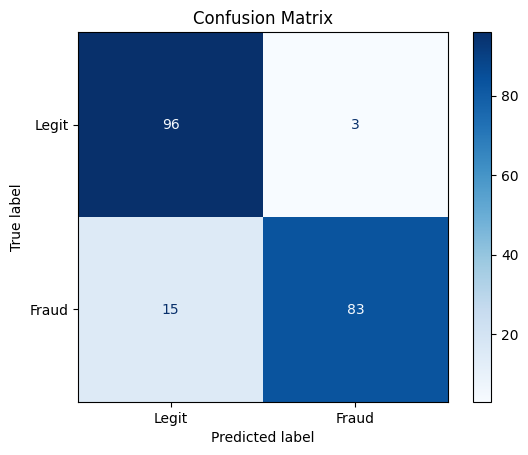

In [31]:
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Legit', 'Fraud'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [32]:

print("Classification Report:")
print(classification_report(Y_test, Y_pred, target_names=['Legitimate', 'Fraudulent']))

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.86      0.97      0.91        99
  Fraudulent       0.97      0.85      0.90        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



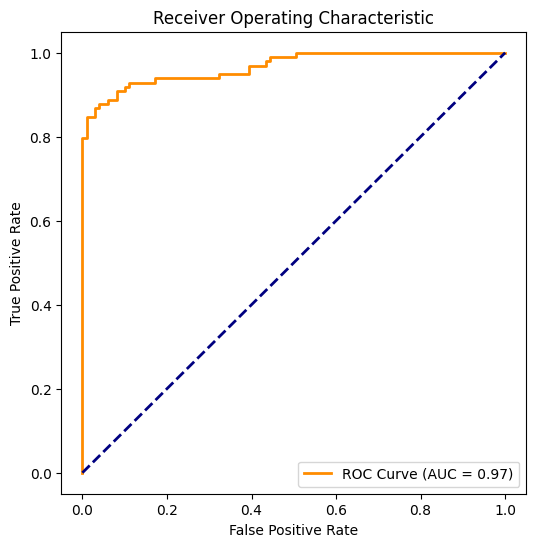

In [33]:
Y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [34]:
scores = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy: {:.2f}%".format(scores.mean()*100))

Cross-Validation Accuracy Scores: [0.97461929 0.9035533  0.88832487 0.92893401 0.90816327]
Mean Accuracy: 92.07%


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
